#                          Fake News Detection

Project Flow: 
   1: Bussiness Problem
   2: Data Gathering
   3: Data Analysis or understanding of a data
   4: Data Preprocessing:
      A: Text Cleaning
      B: Tokenization
      C: Removal Of Stopwords
      D: Lemmatization
      
  5: Vectorization (Convert Text Data into Vector):
     * TF-IDF
  6: Model Building:
     A: Train Test Split
     B: Model object Initialization
     C: Model Prediction
  7: Model Evaluation:
     A: Accuracy_Score
     B: Confusion Matrix
  8: Model Deployment
  9: Prediction on client data.
     


## Required Libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import nltk
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import ngrams
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from  sklearn.tree import DecisionTreeClassifier

 ## Data Gathering

In [2]:
fake_df = pd.read_csv('Fake.csv', encoding='latin-1')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
try:
    true_df = pd.read_csv('True.csv', encoding='latin-1', error_bad_lines=False)
    true_df.head()
except pd.errors.ParserError as e:
    print("ParserError:", e)

C:\Users\DEEPIKA SHERAWAT\anaconda3\New folder\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 11067: expected 4 fields, saw 8\n'


In [4]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Data Analysis

In [5]:
true_df["text"][0]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a \x1cfiscal conservative\x1d on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS\x19 \x1cFace the Nation,\x1d drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense \x1cdiscretionary\x1d spending on program

In [6]:
fake_df.shape , true_df.shape

((23481, 4), (21416, 4))

In [7]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
fake_df[fake_df.duplicated()]

,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA&OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [10]:
fake_df= fake_df.drop_duplicates()

In [11]:
fake_df.shape

(23478, 4)

In [12]:
true_df[true_df.duplicated()]

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21227,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017"
21262,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017"
21289,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21352,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"


In [13]:

true_df = true_df.drop_duplicates()

In [14]:
true_df.shape

(21210, 4)

In [15]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [16]:
true_df.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [17]:
df_true = true_df.copy()
df_fake = fake_df.copy()

In [18]:

df_true["class"]=1
df_fake["class"]=0

In [19]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [20]:
df_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [21]:
df_fake["subject"].value_counts()

News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [22]:
df_true["subject"].value_counts()

politicsNews    11219
worldnews        9991
Name: subject, dtype: int64

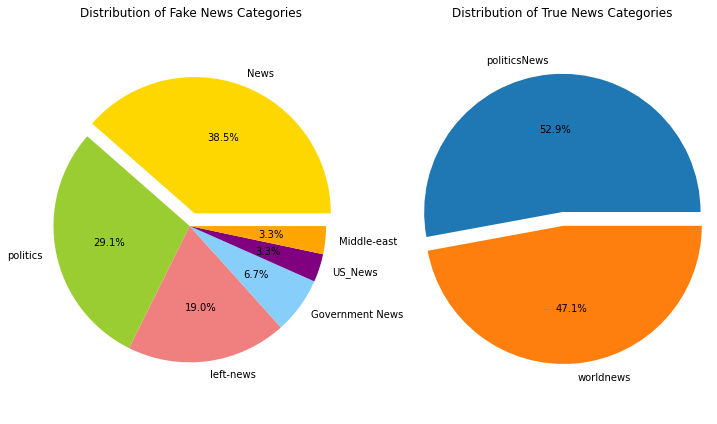

In [23]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'orange']
explode1 = (0.1, 0, 0, 0, 0, 0)
explode2 = (0.1, 0)


# Create a subplot with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first pie chart in the first subplot
fake_labels = df_fake["subject"].value_counts().index
fake_sizes = df_fake["subject"].value_counts().values
ax1.pie(fake_sizes, explode=explode1, labels=fake_labels, colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Distribution of Fake News Categories')

# Plot the second pie chart in the second subplot
true_labels = df_true["subject"].value_counts().index
true_sizes = df_true["subject"].value_counts().values
ax2.pie(true_sizes, labels=true_labels, autopct='%1.1f%%', explode=explode2)
ax2.axis('equal')
ax2.set_title('Distribution of True News Categories')

plt.tight_layout()
plt.show()


In [24]:

df_fake["date"][0]

'December 31, 2017'

In [25]:
# Convert the 'date' column to datetime format
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce')
df_true['date'] = pd.to_datetime(df_true['date'], errors='coerce')

In [26]:
df_fake['date'][0]

Timestamp('2017-12-31 00:00:00')

In [27]:
df_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0


In [28]:

# Extract year, month & day from the 'date' column
df_fake['year'] = df_fake['date'].dt.year
df_fake['month'] = df_fake['date'].dt.month_name()
df_fake['day'] = df_fake['date'].dt.day_name()
df_true['year'] = df_true['date'].dt.year
df_true['month'] = df_true['date'].dt.month_name()
df_true['day'] = df_true['date'].dt.day_name()

In [29]:
df_fake.head()

,title,text,subject,date,class,year,month,day
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,2017.0,December,Sunday
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,2017.0,December,Sunday
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,2017.0,December,Saturday
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,2017.0,December,Friday
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,2017.0,December,Monday


Text(0.5, 1.0, 'Yearwise Fake News Data')

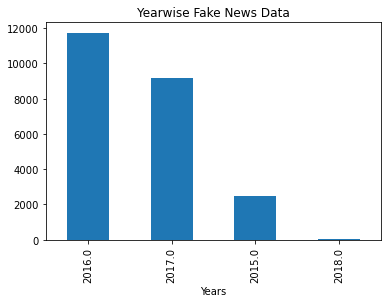

In [30]:
df_fake['year'].value_counts().plot(kind="bar")
plt.xlabel("Years")
plt.title("Yearwise Fake News Data")

In [31]:
df_true['year'].value_counts()

2017    16510
2016     4700
Name: year, dtype: int64

Text(0.5, 1.0, 'Yearwise True News Data')

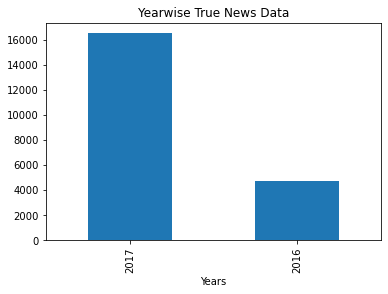

In [32]:
df_true['year'].value_counts().plot(kind="bar")
plt.xlabel("Years")
plt.title("Yearwise True News Data")

Text(0.5, 1.0, 'Monthwise Fake News Data')

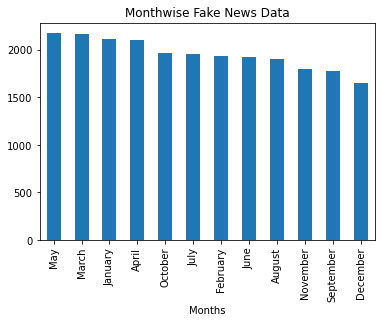

In [33]:
plt.figure(figsize=(6, 4))
df_fake['month'].value_counts().plot(kind="bar")
plt.xlabel("Months")
plt.title("Monthwise Fake News Data")

Text(0.5, 1.0, 'Monthwise True News Data')

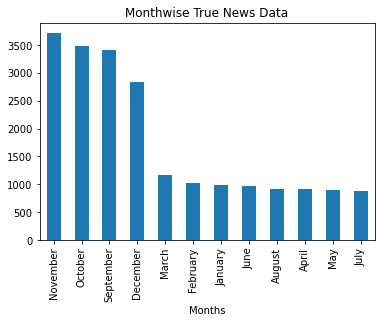

In [34]:
plt.figure(figsize=(6, 4))
df_true['month'].value_counts().plot(kind="bar")
plt.xlabel("Months")
plt.title("Monthwise True News Data")

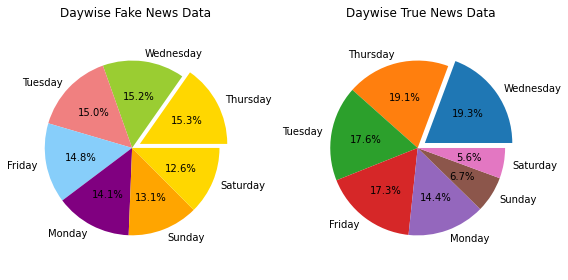

In [35]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'orange']
explode1 = (0.1, 0, 0, 0, 0, 0, 0)
explode2 = (0.1, 0, 0, 0, 0, 0, 0)


# Create a subplot with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

# Plot the first pie chart in the first subplot
fake_labels = df_fake["day"].value_counts().index
fake_sizes = df_fake["day"].value_counts().values
ax1.pie(fake_sizes, explode=explode1, labels=fake_labels, colors=colors, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Daywise Fake News Data')

# Plot the second pie chart in the second subplot
true_labels = df_true["day"].value_counts().index
true_sizes = df_true["day"].value_counts().values
ax2.pie(true_sizes, labels=true_labels, autopct='%1.1f%%', explode=explode2)
ax2.axis('equal')
ax2.set_title('Daywise True News Data')

plt.tight_layout()
plt.show()


In [36]:
pd.crosstab(df_fake['subject'],df_fake['year'])

year,2015.0,2016.0,2017.0,2018.0
subject,,,,
Government News,581,597,390,0
Middle-east,0,400,378,0
News,0,5841,3209,0
US_News,0,405,378,0
left-news,740,1805,1911,0
politics,1157,2706,2935,35


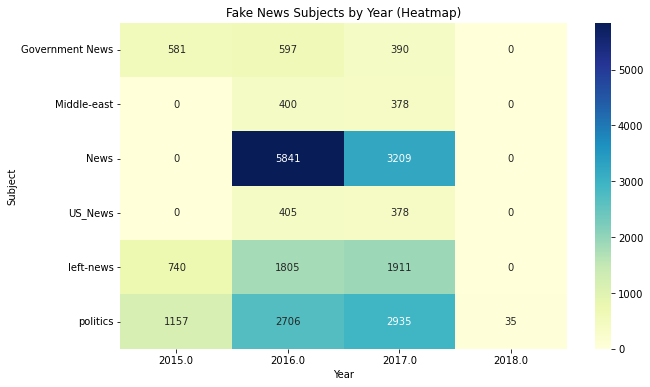

In [37]:
fake_crosstab = pd.crosstab(df_fake['subject'], df_fake['year'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(fake_crosstab, annot=True, cmap="YlGnBu",fmt = 'd')
plt.title('Fake News Subjects by Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Subject')
plt.show()


In [38]:
pd.crosstab(df_true['subject'],df_true['year'])

year,2016,2017
subject,,
politicsNews,4700,6519
worldnews,0,9991


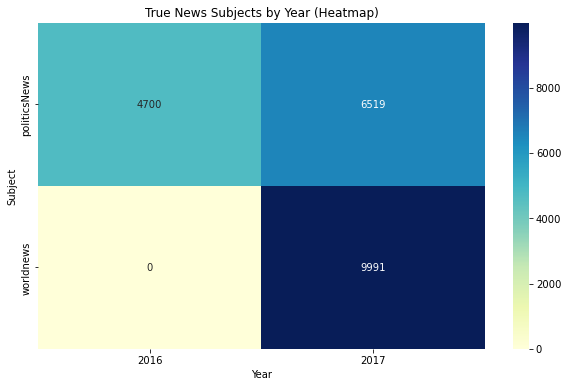

In [39]:
true_crosstab = pd.crosstab(df_true['subject'], df_true['year'])

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(true_crosstab, annot=True, cmap="YlGnBu",fmt='d')
plt.title('True News Subjects by Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Subject')
plt.show()


In [40]:

df_fake = df_fake.drop(["year","month","day"], axis = 1)
df_true= df_true.drop(["year","month","day"], axis = 1)

## Data Preprocessing

### A: Text Cleaning

In [41]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+/www\.\S+','',text)
    text = re.sub("<.*?>+"," ",text)
    text = re.sub("[%s]" % re.escape(string.punctuation)," ",text)
    text = re.sub("\n"," ",text)
    text = re.sub("\w*\d\w*"," ",text)
    return text


In [42]:
df_fake["text"] = df_fake["text"].apply(word_drop)
df_fake["title"] = df_fake["title"].apply(word_drop)

In [43]:
df_fake.head()

,title,text,subject,date,class
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0


In [44]:
df_true["text"] = df_true["text"].apply(word_drop)
df_true["title"] = df_true["title"].apply(word_drop)

In [45]:
df_true.head()

,title,text,subject,date,class
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1


### B: Tokenization

In [46]:
# A function to tokenize the text
def tokenize_text(text):
    return word_tokenize(text)

# we can access the tokens for a specific row using df_true.at[index, "tokens"].

In [47]:

# Tokenize the preprocessed text and store it in a new column "tokens"
df_fake["text_tokens"] = df_fake["text"].apply(tokenize_text)


df_fake["title_tokens"] = df_fake["title"].apply(tokenize_text)

In [48]:
df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, sends, out, embarrassing, new,..."
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,"[on, friday, it, was, revealed, that, former, ...","[sheriff, david, clarke, becomes, an, internet..."
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,"[on, christmas, day, donald, trump, announced,...","[trump, is, so, obsessed, he, even, has, obama..."
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, just, called, out, donald, tru..."


In [49]:
df_true["text_tokens"] = df_true["text"].apply(tokenize_text)
df_true["title_tokens"] = df_true["title"].apply(tokenize_text)

In [50]:

df_true.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1,"[washington, reuters, the, head, of, a, conser...","[as, u, s, budget, fight, looms, republicans, ..."
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1,"[washington, reuters, transgender, people, wil...","[u, s, military, to, accept, transgender, recr..."
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1,"[washington, reuters, the, special, counsel, i...","[senior, u, s, republican, senator, let, mr, m..."
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, by, australian, d..."
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1,"[seattle, washington, reuters, president, dona...","[trump, wants, postal, service, to, charge, mu..."


### C: Removal Of Stopwords

In [51]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    meaningful_tokens = [token for token in tokens if token.lower() not in stop_words]
    return meaningful_tokens

In [52]:
df_fake["text_tokens"] = df_fake["text_tokens"].apply(remove_stopwords)
df_fake["title_tokens"] = df_fake["title_tokens"].apply(remove_stopwords)

In [53]:
df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,"[donald, trump, wish, americans, happy, new, y...","[donald, trump, sends, embarrassing, new, year..."
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,"[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo..."
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,"[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obama, name, coded, we..."
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, used, annual, christmas, day, ...","[pope, francis, called, donald, trump, christm..."


In [54]:
df_true["text_tokens"] = df_true["text_tokens"].apply(remove_stopwords)
df_true["title_tokens"] = df_true["title_tokens"].apply(remove_stopwords)

In [55]:
df_true.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1,"[washington, reuters, head, conservative, repu...","[u, budget, fight, looms, republicans, flip, f..."
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1,"[washington, reuters, transgender, people, all...","[u, military, accept, transgender, recruits, m..."
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1,"[washington, reuters, special, counsel, invest...","[senior, u, republican, senator, let, mr, muel..."
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, australian, diplo..."
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1,"[seattle, washington, reuters, president, dona...","[trump, wants, postal, service, charge, much, ..."


In [56]:
df_true['title_tokens'][0]

['u', 'budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script']

### D: Lemmatization

In [57]:
# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [58]:
# Applying lemmatization to the 'text' & 'title' tokens column
df_fake['text_tokens'] = df_fake['text_tokens'].apply(lemmatize_tokens)
df_fake['title_tokens'] = df_fake['title_tokens'].apply(lemmatize_tokens)

In [59]:

df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,"[donald, trump, wish, american, happy, new, ye...","[donald, trump, sends, embarrassing, new, year..."
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,"[house, intelligence, committee, chairman, dev...","[drunk, bragging, trump, staffer, started, rus..."
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,"[friday, revealed, former, milwaukee, sheriff,...","[sheriff, david, clarke, becomes, internet, jo..."
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,"[christmas, day, donald, trump, announced, wou...","[trump, obsessed, even, obama, name, coded, we..."
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,"[pope, francis, used, annual, christmas, day, ...","[pope, francis, called, donald, trump, christm..."


In [60]:
df_true['text_tokens'] = df_true['text_tokens'].apply(lemmatize_tokens)
df_true['title_tokens'] = df_true['title_tokens'].apply(lemmatize_tokens)

In [61]:
df_true.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1,"[washington, reuters, head, conservative, repu...","[u, budget, fight, loom, republican, flip, fis..."
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1,"[washington, reuters, transgender, people, all...","[u, military, accept, transgender, recruit, mo..."
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1,"[washington, reuters, special, counsel, invest...","[senior, u, republican, senator, let, mr, muel..."
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1,"[washington, reuters, trump, campaign, adviser...","[fbi, russia, probe, helped, australian, diplo..."
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1,"[seattle, washington, reuters, president, dona...","[trump, want, postal, service, charge, much, a..."


### Representation of Wordcloud

In [62]:
# Combine all the lemmatized tokens into a single list
all_fake_lemmatized_text = [token for tokens_list in df_fake["text_tokens"] for token in tokens_list]
all_fake_lemmatized_title = [token for tokens_list in df_fake["title_tokens"] for token in tokens_list]


In [63]:
# Count the frequency of each lemmatized word
fake_text_freq = Counter(all_fake_lemmatized_text)
fake_title_freq = Counter(all_fake_lemmatized_title)

In [64]:
fake_text_freq

Counter({'donald': 17662,
         'trump': 79369,
         'wish': 778,
         'american': 18106,
         'happy': 998,
         'new': 14366,
         'year': 19047,
         'leave': 1649,
         'instead': 3188,
         'give': 3898,
         'shout': 156,
         'enemy': 1019,
         'hater': 226,
         'dishonest': 287,
         'fake': 3006,
         'news': 14610,
         'medium': 11792,
         'former': 7289,
         'reality': 2008,
         'show': 8327,
         'star': 1794,
         'one': 25382,
         'job': 5297,
         'country': 11443,
         'rapidly': 175,
         'grows': 61,
         'stronger': 255,
         'smarter': 71,
         'want': 9885,
         'friend': 3266,
         'supporter': 5030,
         'even': 14009,
         'healthy': 247,
         'president': 28269,
         'angry': 1040,
         'pant': 225,
         'tweeted': 1632,
         'great': 4304,
         'america': 11244,
         'j': 3861,
         'realdonaldtru

In [65]:
fake_title_freq

Counter({'donald': 848,
         'trump': 9349,
         'sends': 60,
         'embarrassing': 80,
         'new': 905,
         'year': 464,
         'eve': 13,
         'message': 193,
         'disturbing': 61,
         'drunk': 28,
         'bragging': 23,
         'staffer': 64,
         'started': 31,
         'russian': 348,
         'collusion': 53,
         'investigation': 175,
         'sheriff': 96,
         'david': 52,
         'clarke': 26,
         'becomes': 28,
         'internet': 125,
         'joke': 72,
         'threatening': 52,
         'poke': 4,
         'people': 515,
         'eye': 48,
         'obsessed': 33,
         'even': 191,
         'obama': 2581,
         'name': 114,
         'coded': 1,
         'website': 54,
         'image': 386,
         'pope': 52,
         'francis': 17,
         'called': 153,
         'christmas': 79,
         'speech': 443,
         'racist': 524,
         'alabama': 51,
         'cop': 479,
         'brutalize': 2,
   

In [66]:
# Print the most common lemmatized words and their frequencies
print(fake_text_freq.most_common(10))

[('trump', 79369), ('said', 33760), ('president', 28269), ('people', 26621), ('one', 25382), ('u', 24484), ('state', 23625), ('would', 23550), ('clinton', 19778), ('time', 19199)]


In [67]:


print(fake_title_freq.most_common(10))

[('trump', 9349), ('video', 3409), ('obama', 2581), ('hillary', 2310), ('watch', 1932), ('clinton', 1175), ('president', 1165), ('u', 1148), ('get', 980), ('black', 973)]


In [68]:
all_true_lemmatized_text = [token for tokens_list in df_true["text_tokens"] for token in tokens_list]
all_true_lemmatized_title = [token for tokens_list in df_true["title_tokens"] for token in tokens_list]


In [69]:
# Count the frequency of each lemmatized word
true_text_freq = Counter(all_true_lemmatized_text)
true_title_freq = Counter(all_true_lemmatized_title)

In [70]:
# Print the most common lemmatized words and their frequencies
print(true_text_freq.most_common(10))

[('said', 97866), ('trump', 54115), ('u', 46534), ('state', 37225), ('would', 31240), ('reuters', 28674), ('president', 28418), ('republican', 22862), ('year', 22354), ('government', 19681)]


In [71]:
print(true_title_freq.most_common(10))

[('trump', 5523), ('u', 4688), ('say', 3200), ('house', 1449), ('republican', 972), ('russia', 967), ('north', 912), ('korea', 887), ('new', 871), ('state', 819)]


In [72]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DEEPIKA SHERAWAT\anaconda3\New folder\python.exe -m pip install --upgrade pip' command.


In [73]:
pip install pip==21.2.4

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DEEPIKA SHERAWAT\anaconda3\New folder\python.exe -m pip install --upgrade pip' command.


In [74]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\DEEPIKA SHERAWAT\anaconda3\New folder\python.exe -m pip install --upgrade pip' command.


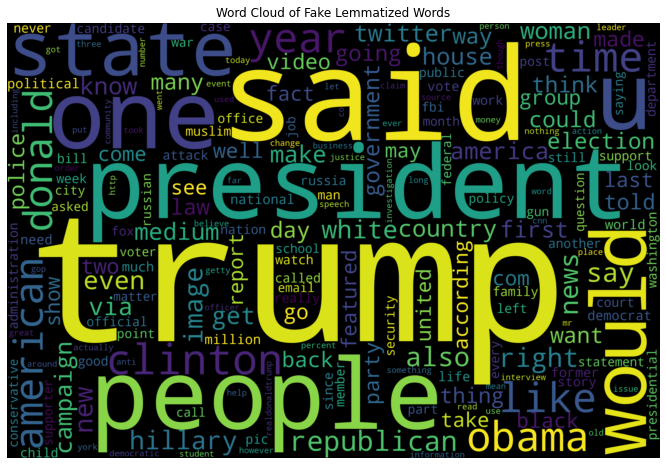

In [75]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, background_color='black').generate_from_frequencies(fake_text_freq)

# Display the generated word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fake Lemmatized Words')
plt.show()
#wordcloud.to_file("fake.png")

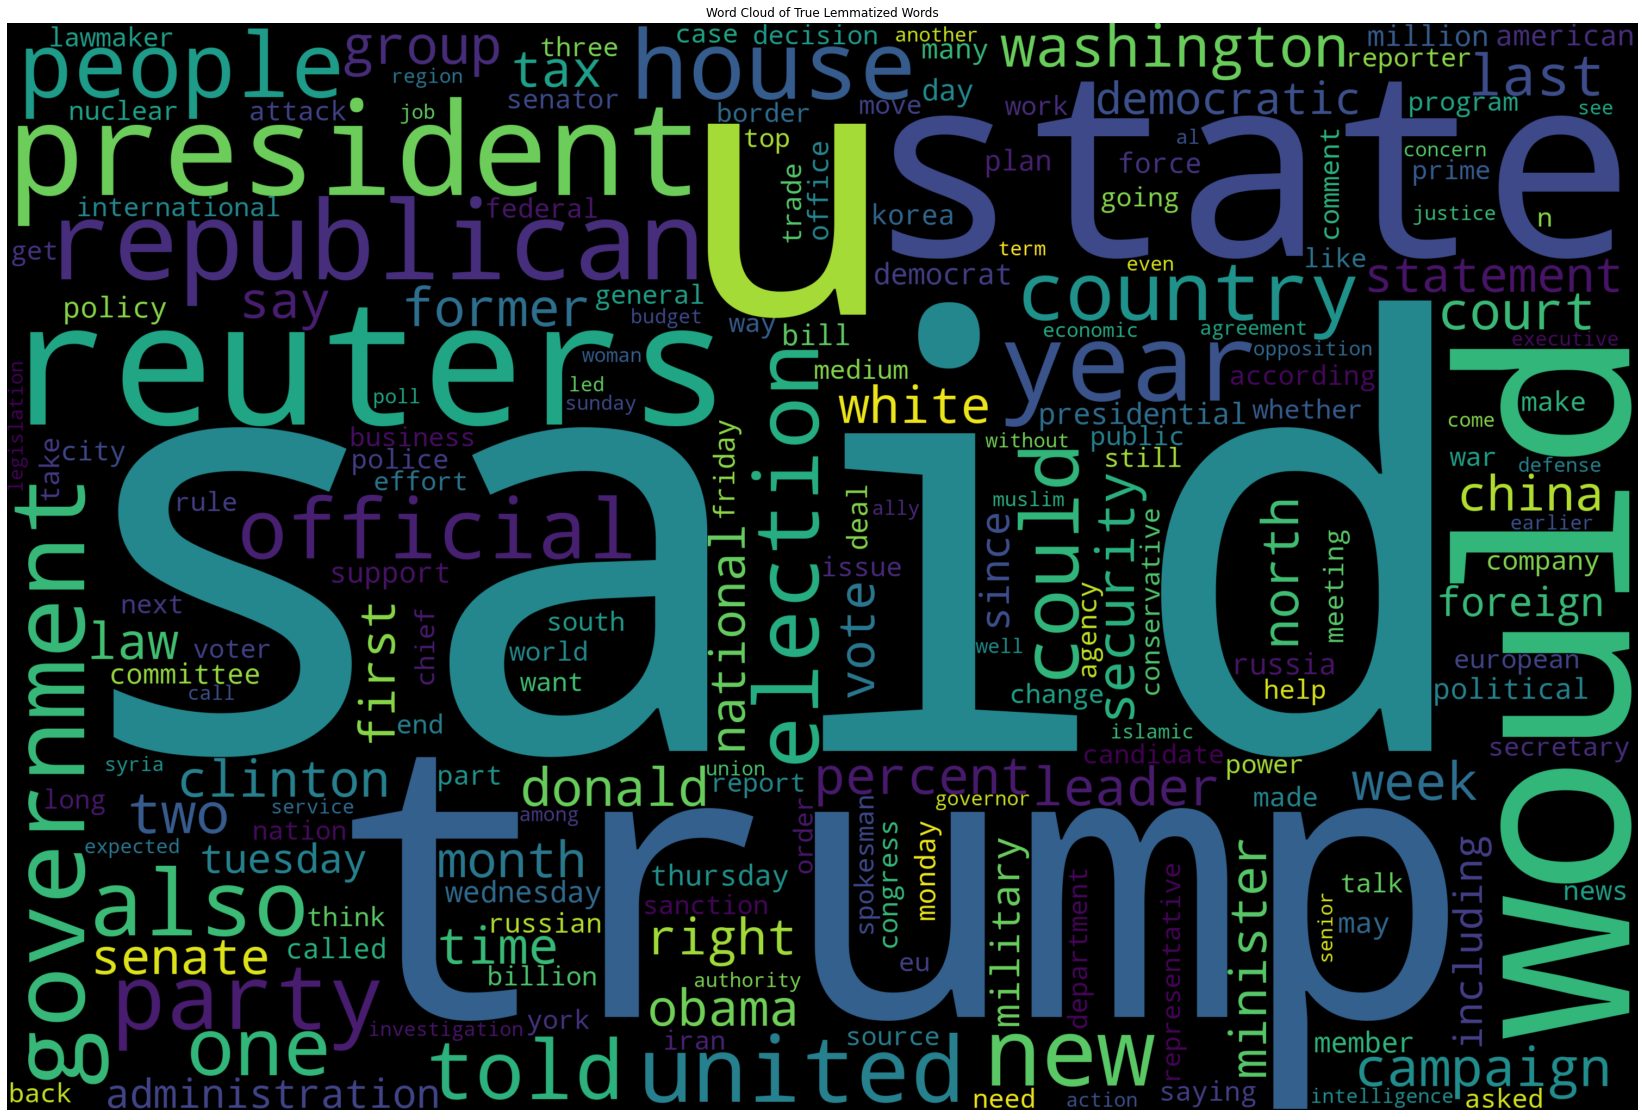

In [76]:
# Create a WordCloud object
wordcloud = WordCloud(width=3000, height=2000, background_color='black').generate_from_frequencies(true_text_freq)

# Display the generated word cloud
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of True Lemmatized Words')
plt.show()
#wordcloud.to_file("true.png")

### Unigrams

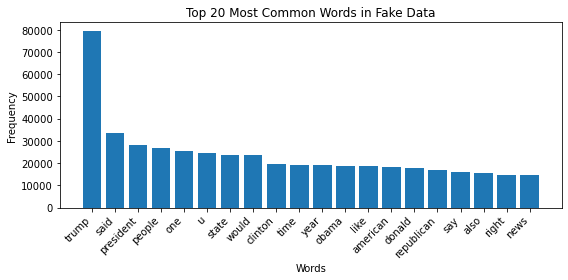

In [77]:
# Get the most common 20 words and their frequencies
most_fake_common_words = fake_text_freq.most_common(20)
most_fake_common_words, frequencies = zip(*most_fake_common_words)

# Plot the most common words and their frequencies
plt.figure(figsize=(8, 4))
plt.bar(most_fake_common_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Fake Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


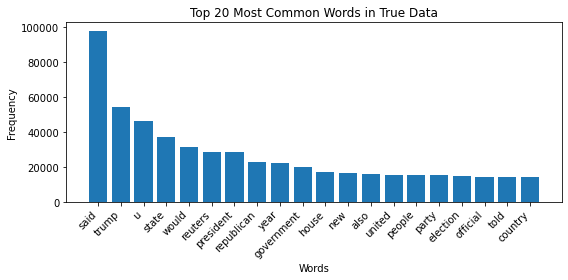

In [78]:
# Get the most common 20 words and their frequencies
most_true_common_words = true_text_freq.most_common(20)
most_true_common_words, frequencies = zip(*most_true_common_words)

# Plot the most common words and their frequencies
plt.figure(figsize=(8, 4))
plt.bar(most_true_common_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in True Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Bigrams

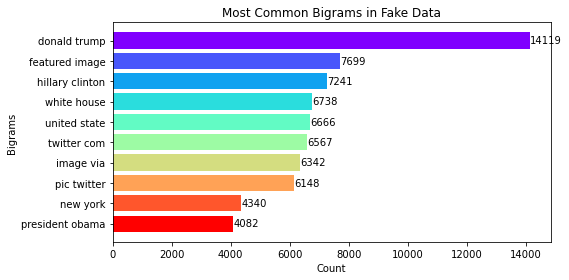

In [79]:
bigram_lists = [list(ngrams(tokens, 2)) for tokens in df_fake['text_tokens']]
# Flatten the list of bigrams
all_bigrams = [bigram for bigrams_list in bigram_lists for bigram in bigrams_list]
# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)  
# Extract labels and counts from most_common_bigrams
bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigrams]
bigram_counts = [count for _, count in most_common_bigrams]


# Create a gradient of rainbow colors
num_colors = len(bigram_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Create a horizontal bar plot for most common bigrams with rainbow colors
plt.figure(figsize=(8, 4))
bars = plt.barh(bigram_labels, bigram_counts, color=colors)

# Adding labels and counts on the bars
for bar, count in zip(bars, bigram_counts):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, str(count), va='center')

plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.title('Most Common Bigrams in Fake Data')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()
plt.show()


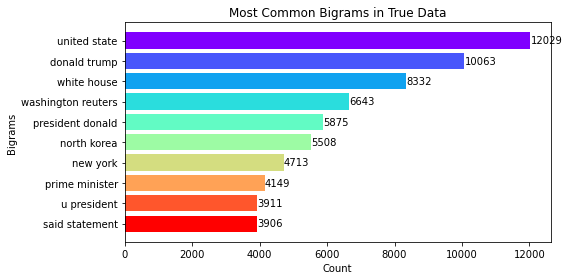

In [80]:
bigram_lists = [list(ngrams(tokens, 2)) for tokens in df_true['text_tokens']]
# Flatten the list of bigrams
all_bigrams = [bigram for bigrams_list in bigram_lists for bigram in bigrams_list]
# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)  
# Extract labels and counts from most_common_bigrams
bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigrams]
bigram_counts = [count for _, count in most_common_bigrams]


# Create a gradient of rainbow colors
num_colors = len(bigram_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Create a horizontal bar plot for most common bigrams with rainbow colors
plt.figure(figsize=(8,4))
bars = plt.barh(bigram_labels, bigram_counts, color=colors)

# Adding labels and counts on the bars
for bar, count in zip(bars, bigram_counts):
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, str(count), va='center')

plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.title('Most Common Bigrams in True Data')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()
plt.show()


### Trigrams

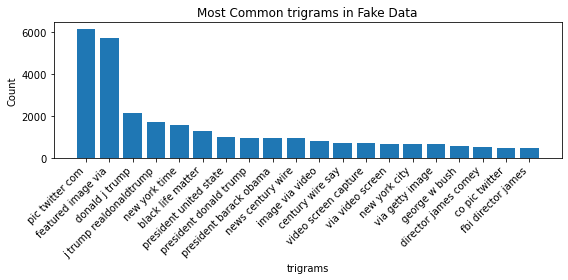

In [81]:
trigram_lists = [list(ngrams(tokens, 3)) for tokens in df_fake['text_tokens']]
all_trigrams = [trigram for trigrams_list in trigram_lists for trigram in trigrams_list]
# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

most_common_trigrams = trigram_counts.most_common(20)  
trigram_labels = [' '.join(trigram) for trigram, _ in most_common_trigrams]
trigram_counts = [count for _, count in most_common_trigrams]

# Create a vertical bar plot for most common trigrams
plt.figure(figsize=(8, 4))
plt.bar(trigram_labels, trigram_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('trigrams')
plt.ylabel('Count')
plt.title('Most Common trigrams in Fake Data')
plt.tight_layout()
plt.show()


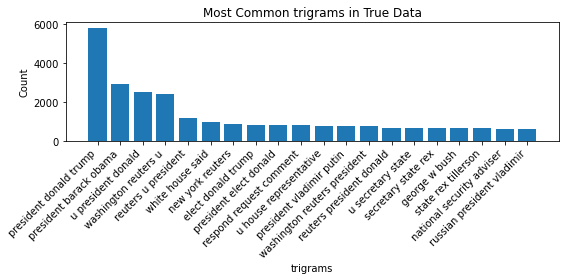

In [82]:
trigram_lists = [list(ngrams(tokens, 3)) for tokens in df_true['text_tokens']]
all_trigrams = [trigram for trigrams_list in trigram_lists for trigram in trigrams_list]
# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

most_common_trigrams = trigram_counts.most_common(20)  
trigram_labels = [' '.join(trigram) for trigram, _ in most_common_trigrams]
trigram_counts = [count for _, count in most_common_trigrams]

# Create a vertical bar plot for most common trigrams
plt.figure(figsize=(8, 4))
plt.bar(trigram_labels, trigram_counts)
plt.xticks(rotation=45, ha='right')
plt.xlabel('trigrams')
plt.ylabel('Count')
plt.title('Most Common trigrams in True Data')
plt.tight_layout()
plt.show()


In [83]:
# Remove extra spaces and convert tokens back to a string
df_fake["text_tokens"] = df_fake["text_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))
df_fake["title_tokens"] = df_fake["title_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))
df_true["text_tokens"] = df_true["text_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))
df_true["title_tokens"] = df_true["title_tokens"].apply(lambda x: ' '.join(token.strip() for token in x))

In [84]:
df_fake.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,donald trump wish american happy new year leav...,donald trump sends embarrassing new year eve m...
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,christmas day donald trump announced would bac...,trump obsessed even obama name coded website i...
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,pope francis used annual christmas day message...,pope francis called donald trump christmas speech


In [85]:
df_true.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,as u s budget fight looms republicans flip t...,washington reuters the head of a conservat...,politicsNews,2017-12-31,1,washington reuters head conservative republica...,u budget fight loom republican flip fiscal script
1,u s military to accept transgender recruits o...,washington reuters transgender people will...,politicsNews,2017-12-29,1,washington reuters transgender people allowed ...,u military accept transgender recruit monday p...
2,senior u s republican senator let mr muell...,washington reuters the special counsel inv...,politicsNews,2017-12-31,1,washington reuters special counsel investigati...,senior u republican senator let mr mueller job
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser ...,politicsNews,2017-12-30,1,washington reuters trump campaign adviser geor...,fbi russia probe helped australian diplomat ti...
4,trump wants postal service to charge much mor...,seattle washington reuters president donal...,politicsNews,2017-12-29,1,seattle washington reuters president donald tr...,trump want postal service charge much amazon s...


In [86]:
df = pd.concat([df_fake,df_true], ignore_index = True)

In [87]:
df.head()

,title,text,subject,date,class,text_tokens,title_tokens
0,donald trump sends out embarrassing new year ...,donald trump just couldn t wish all americans ...,News,2017-12-31,0,donald trump wish american happy new year leav...,donald trump sends embarrassing new year eve m...
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,0,house intelligence committee chairman devin nu...,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauk...,News,2017-12-30,0,friday revealed former milwaukee sheriff david...,sheriff david clarke becomes internet joke thr...
3,trump is so obsessed he even has obama s name...,on christmas day donald trump announced that ...,News,2017-12-29,0,christmas day donald trump announced would bac...,trump obsessed even obama name coded website i...
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,News,2017-12-25,0,pope francis used annual christmas day message...,pope francis called donald trump christmas speech


In [88]:
df['class'].value_counts()

0    23478
1    21210
Name: class, dtype: int64

In [89]:
df[df.duplicated()]

,title,text,subject,date,class,text_tokens,title_tokens


In [90]:
#Shuffling of Data
df = df.sample(frac=1.0, random_state=42)
df.head()

,title,text,subject,date,class,text_tokens,title_tokens
17893,wow leftist librarian rejects shipment of chi...,a school librarian in cambridge massachusetts...,left-news,2017-09-28,0,school librarian cambridge massachusetts rejec...,wow leftist librarian reject shipment child bo...
39481,kenya opposition leader calls for calm in slum...,nairobi reuters kenyan opposition leader r...,worldnews,2017-10-29,1,nairobi reuters kenyan opposition leader raila...,kenya opposition leader call calm slum hit dea...
36272,egypt rejects u s decision to move its embass...,cairo reuters egypt rejected the u s deci...,worldnews,2017-12-06,1,cairo reuters egypt rejected u decision move e...,egypt reject u decision move embassy jerusalem...
21761,audio nation of islam leader farrakhan we w...,after a recent speech given by minister louis ...,left-news,2015-05-08,0,recent speech given minister louis farrakhan t...,audio nation islam leader farrakhan kill go u
7557,trump rally nearly turns into a full blown ra...,tensions ran high outside of a campaign rally ...,News,2016-03-11,0,tension ran high outside campaign rally donald...,trump rally nearly turn full blown race war st...


In [91]:
df['title_tokens'][0]

'donald trump sends embarrassing new year eve message disturbing'

In [92]:
# Concatenate the values of the 'text' and 'title' columns and create a new column
df['input_text'] = df['title_tokens'] + ' ' + df['text_tokens']

In [93]:
df.head()

,title,text,subject,date,class,text_tokens,title_tokens,input_text
17893,wow leftist librarian rejects shipment of chi...,a school librarian in cambridge massachusetts...,left-news,2017-09-28,0,school librarian cambridge massachusetts rejec...,wow leftist librarian reject shipment child bo...,wow leftist librarian reject shipment child bo...
39481,kenya opposition leader calls for calm in slum...,nairobi reuters kenyan opposition leader r...,worldnews,2017-10-29,1,nairobi reuters kenyan opposition leader raila...,kenya opposition leader call calm slum hit dea...,kenya opposition leader call calm slum hit dea...
36272,egypt rejects u s decision to move its embass...,cairo reuters egypt rejected the u s deci...,worldnews,2017-12-06,1,cairo reuters egypt rejected u decision move e...,egypt reject u decision move embassy jerusalem...,egypt reject u decision move embassy jerusalem...
21761,audio nation of islam leader farrakhan we w...,after a recent speech given by minister louis ...,left-news,2015-05-08,0,recent speech given minister louis farrakhan t...,audio nation islam leader farrakhan kill go u,audio nation islam leader farrakhan kill go u ...
7557,trump rally nearly turns into a full blown ra...,tensions ran high outside of a campaign rally ...,News,2016-03-11,0,tension ran high outside campaign rally donald...,trump rally nearly turn full blown race war st...,trump rally nearly turn full blown race war st...


In [94]:
len(df['title_tokens'][0]) , len(df['text_tokens'][0]), len(df['input_text'][0])

(63, 1734, 1798)

In [95]:
df = df.drop(['title','text','subject','date'], axis = 1)

In [96]:
df = df.drop(['text_tokens','title_tokens'], axis = 1)

In [97]:
df.head()

,class,input_text
17893,0,wow leftist librarian reject shipment child bo...
39481,1,kenya opposition leader call calm slum hit dea...
36272,1,egypt reject u decision move embassy jerusalem...
21761,0,audio nation islam leader farrakhan kill go u ...
7557,0,trump rally nearly turn full blown race war st...


In [98]:
df['class'].value_counts()

0    23478
1    21210
Name: class, dtype: int64

### Train Test Spliting

In [100]:
x= df['input_text']
Y = df['class']

In [101]:
vectorizer = TfidfVectorizer()

In [102]:
X = vectorizer.fit_transform(x)

In [104]:
X.shape

(44688, 97384)

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=40)

In [106]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((29940, 97384), (14748, 97384), (29940,), (14748,))

## Feature Extraction : Vectorization

## Model Building : 

###  1. Random Forest Classifier

In [107]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [108]:
rf_train_predictions = rf_classifier.predict(X_train)

In [109]:
rf_test_predictions = rf_classifier.predict(X_test)

In [110]:

print(" Confusion Matrix For the Train Data: ")
confusion_matrix(Y_train,rf_train_predictions) 

 Confusion Matrix For the Train Data: 


array([[15827,     0],
       [    0, 14113]], dtype=int64)

In [111]:
print(" Confusion Matrix For the Test Data: ")
confusion_matrix(Y_test,rf_test_predictions)

 Confusion Matrix For the Test Data: 


array([[7578,   73],
       [  68, 7029]], dtype=int64)

In [112]:
rf_train_accuracy = accuracy_score(Y_train,rf_train_predictions)
rf_test_accuracy = accuracy_score(Y_test,rf_test_predictions)

In [113]:
print(" Random Forest Model Accuracy Score for the Train Data is :" , (rf_train_accuracy)*100, "%")
print(" Random Forest Model Accuracy Score for the Test Data is :" ,(rf_test_accuracy)*100 , "%")

 Random Forest Model Accuracy Score for the Train Data is : 100.0 %
 Random Forest Model Accuracy Score for the Test Data is : 99.0439381611066 %


### 2. Logistic Regression

In [114]:
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,Y_train)

LogisticRegression()

In [117]:
LR_train_predictions = LR_classifier.predict(X_train)

In [118]:
LR_test_predictions = LR_classifier.predict(X_test)

In [119]:
print(" Confusion Matrix For the Train Data: ")

confusion_matrix(Y_train,LR_train_predictions)

 Confusion Matrix For the Train Data: 


array([[15670,   157],
       [  120, 13993]], dtype=int64)

In [120]:
print(" Confusion Matrix For the Test Data: ")

confusion_matrix(Y_test,LR_test_predictions)

 Confusion Matrix For the Test Data: 


array([[7532,  119],
       [  88, 7009]], dtype=int64)

In [121]:
LR_train_accuracy = accuracy_score(Y_train,LR_train_predictions)
LR_test_accuracy = accuracy_score(Y_test,LR_test_predictions)

In [122]:

print("Logistic Regression Model Accuracy Score for the Train Data is :" ,(LR_train_accuracy)*100, "%")
print(" Logistic Regression Model Accuracy Score for the Test Data is :" ,(LR_test_accuracy)*100 , "%")

Logistic Regression Model Accuracy Score for the Train Data is : 99.0748162992652 %
 Logistic Regression Model Accuracy Score for the Test Data is : 98.59641985353946 %


### 3. Decision Tree

In [123]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [124]:
DT_train_predictions = DT_classifier.predict(X_train)

In [125]:
DT_test_predictions = DT_classifier.predict(X_test)

In [126]:
print(" Confusion Matrix For the Train Data: ")

confusion_matrix(Y_train,DT_train_predictions)

 Confusion Matrix For the Train Data: 


array([[15827,     0],
       [    0, 14113]], dtype=int64)

In [127]:
print(" Confusion Matrix For the Test Data: ")

confusion_matrix(Y_test,DT_test_predictions)

 Confusion Matrix For the Test Data: 


array([[7624,   27],
       [  40, 7057]], dtype=int64)

In [128]:

DT_train_accuracy = accuracy_score(Y_train,DT_train_predictions)
DT_test_accuracy = accuracy_score(Y_test,DT_test_predictions)

In [129]:
print("Decision Tree Model Accuracy Score for the Train Data is :" ,(DT_train_accuracy)*100, "%")
print("Decision Tree Model Accuracy Score for the Test Data is :" , (DT_test_accuracy)*100, "%")

Decision Tree Model Accuracy Score for the Train Data is : 100.0 %
Decision Tree Model Accuracy Score for the Test Data is : 99.54570111201518 %


### 4. SVC

In [131]:
SVC_classifier = SVC(kernel ="linear")
SVC_classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [132]:
SVC_train_predictions = SVC_classifier.predict(X_train)

In [133]:
SVC_test_predictions = SVC_classifier.predict(X_test)

In [134]:
print(" Confusion Matrix For the Train Data: ")

confusion_matrix(Y_train,SVC_train_predictions)

 Confusion Matrix For the Train Data: 


array([[15787,    40],
       [   17, 14096]], dtype=int64)

In [135]:
print(" Confusion Matrix For the Test Data: ")

confusion_matrix(Y_test,SVC_test_predictions)

 Confusion Matrix For the Test Data: 


array([[7604,   47],
       [  38, 7059]], dtype=int64)

In [136]:
SVC_train_accuracy = accuracy_score(Y_train,SVC_train_predictions)
SVC_test_accuracy =  accuracy_score(Y_test,SVC_test_predictions)

In [137]:
print("SVC Model Accuracy Score for the Train Data is :" ,(SVC_train_accuracy)*100, "%")
print("SVC Model Accuracy Score for the Test Data is :" ,(SVC_test_accuracy)*100, "%")

SVC Model Accuracy Score for the Train Data is : 99.80961923847696 %
SVC Model Accuracy Score for the Test Data is : 99.42365066449688 %


### 5. Naive Bayes

In [138]:
from sklearn.naive_bayes import MultinomialNB

In [139]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,Y_train)

MultinomialNB()

In [140]:
NB_train_predictions = NB_classifier.predict(X_train)

In [141]:
NB_test_predictions = NB_classifier.predict(X_test)

In [142]:
print(" Confusion Matrix For the Train Data: ")

confusion_matrix(Y_train,NB_train_predictions)

 Confusion Matrix For the Train Data: 


array([[15167,   660],
       [ 1037, 13076]], dtype=int64)

In [143]:
print(" Confusion Matrix For the Test Data: ")

confusion_matrix(Y_test,NB_test_predictions)

 Confusion Matrix For the Test Data: 


array([[7282,  369],
       [ 572, 6525]], dtype=int64)

In [144]:
NB_train_accuracy = accuracy_score(Y_train,NB_train_predictions)
NB_test_accuracy = accuracy_score(Y_test,NB_test_predictions)

In [145]:


print("Naive Bayes Model Accuracy Score for the Train Data is :" ,(NB_train_accuracy)*100, "%")
print("Naive Bayes Model Accuracy Score for the Test Data is :" ,(NB_test_accuracy)*100 , "%")

Naive Bayes Model Accuracy Score for the Train Data is : 94.33199732798931 %
Naive Bayes Model Accuracy Score for the Test Data is : 93.61947382695959 %


### 6. Gradient Boosting Classifier

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
GB_classifier = xgb.XGBClassifier()
GB_classifier.fit(X_train,Y_train)

In [ ]:
GB_train_predictions = GB_classifier.predict(X_train)

In [ ]:
GB_test_predictions = GB_classifier.predict(X_test)

In [ ]:
print(" Confusion Matrix For the Train Data: ")

confusion_matrix(Y_train,GB_train_predictions)

In [ ]:
print(" Confusion Matrix For the Test Data: ")

confusion_matrix(Y_test,GB_test_predictions)

In [ ]:
GB_train_accuracy = accuracy_score(Y_train,GB_train_predictions)
GB_test_accuracy = accuracy_score(Y_test,GB_test_predictions)

In [ ]:
print("Gradient Boosting Model Accuracy Score for the Train Data is :" ,(GB_train_accuracy)*100, "%")
print("Gradient Boosting Model Accuracy Score for the Test Data is :" ,(GB_test_accuracy)*100 , "%")

### 7.  Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
RC_classifier = RidgeClassifier()
RC_classifier.fit(X_train,Y_train)

In [ ]:
RC_train_predictions = RC_classifier.predict(X_train)

In [ ]:
RC_test_predictions = RC_classifier.predict(X_test)

In [ ]:
print(" Confusion Matrix For the Train Data: ")

confusion_matrix(Y_train,RC_train_predictions)

In [ ]:
print(" Confusion Matrix For the Test Data: ")

confusion_matrix(Y_test,RC_test_predictions)

In [ ]:
RC_train_accuracy = accuracy_score(Y_train,RC_train_predictions)
RC_test_accuracy = accuracy_score(Y_test,RC_test_predictions)

In [ ]:
print("Ridge Classifier Model Accuracy Score for the Train Data is :" ,(RC_train_accuracy)*100, "%")
print("Ridge Classifier Model Accuracy Score for the Test Data is :" , (RC_test_accuracy)*100, "%")

## Models Evaluation

In [ ]:
from matplotlib import cm

model_names = ["Random Forest", "Logistic Regression", "Decision Tree", "SVC",
               "Naive Bayes", "Gradient Boosting", "Ridge Classifier"]
accuracy_scores = [rf_test_accuracy, LR_test_accuracy, DT_test_accuracy, SVC_test_accuracy, NB_test_accuracy, GB_test_accuracy,
                   RC_test_accuracy]

colors = cm.rainbow(np.linspace(0, 1, len(accuracy_scores)))

bar_positions = np.arange(len(accuracy_scores))
bar_width = 0.5
plt.figure(figsize =(8,4))
bars = plt.barh(bar_positions, accuracy_scores, height=bar_width, color=colors, linewidth=1.5)

plt.yticks(bar_positions, model_names)
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Accuracy Scores of Different Models')

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_width()+0.15, bar.get_y() + bar.get_height()/2, f'{score:.2%}', va='center', ha='left')

plt.tight_layout()
plt.show()


## Final Model : Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

model = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [150,200],
    'learning_rate': [0.1],
    'gamma':  [0.4],
    'min_child_weight': [4, 6],
     'max_depth': [6,8],
    'subsample': [0.8],
    'colsample_bytree': [0.7]
}
    

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose = 10
)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)


## Final Model Building

In [ ]:
final_model = xgb.XGBClassifier(n_estimators =200,
                               random_state = 10,
                               gamma=0.4,
                               n_jobs = -1,
                               min_child_weight = 4,
                               subsample = 0.8,
                               learning_rate = 0.2,
                               max_depth = 8,
                               colsample_bytree = 0.7,
                               eval_metric = 'error'
                               )
final_model.fit(X_train,Y_train)

In [ ]:
final_train_predictions = final_model.predict(X_train)

In [ ]:
final_test_predictions = final_model.predict(X_test)

In [ ]:
final_train_accuracy = accuracy_score(Y_train,final_train_predictions)
final_test_accuracy = accuracy_score(Y_test,final_test_predictions)

In [ ]:
print(" Final Model Accuracy Score for the Train Data is :" ,(final_train_accuracy)*100, "%")
print("Final Model Accuracy Score for the Test Data is :" ,(final_test_accuracy)*100 , "%")

### Pipeline

In [ ]:
import pickle

In [ ]:
model_filename = 'News_Detection_Trained_Model.sav'
pickle.dump(final_model, open(model_filename, 'wb'))
vectorizer_filename = 'News_Detection_Tfidf_Vectorizer.sav'
pickle.dump(vectorizer, open(vectorizer_filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('News_Detection_Trained_Model.sav','rb'))
loaded_vectorizer = pickle.load(open('News_Detection_Tfidf_Vectorizer.sav', 'rb'))

In [ ]:
class Preprocessing:
    
    def __init__(self,data):
        self.data = data
    
    def text_preprocessing(self):
        pred_text = [self.data]
        preprocess_text = []
        lm = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        for text in pred_text:
            text = text.lower()
            text = re.sub('^a-zA-Z0-9',' ',text)
            text = re.sub('\[.*?\]','',text)
            text = re.sub("\\W"," ",text)
            text = re.sub('https?://\S+/www\.\S+','',text)
            text = re.sub("<.*?>+"," ",text)
            text = re.sub("[%s]" % re.escape(string.punctuation)," ",text)
            text = re.sub("\n"," ",text)
            text = re.sub("\w*\d\w*"," ",text)
            text = word_tokenize(text)
            text = [lm.lemmatize(x) for x in text if x not in stop_words]
            text = " ".join(text)
            preprocess_text.append(text)
        return preprocess_text          

In [ ]:
class Prediction:
    
    def __init__(self,pred_data,model):
        self.pred_data = pred_data
        self.model =  model
    
    def prediction_model(self):
        preprocess_data = Preprocessing(self.pred_data).text_preprocessing()
        data = vectorizer.transform(preprocess_data)
        prediction = self.model.predict(data)
        
        if prediction[0] == 0:
            return "The News is Fake."
        
        else:
            return "The News is Real."

In [ ]:
user_data = true_df['text'][0]

In [ ]:
Prediction(user_data,final_model).prediction_model()

# Model deployment

In [ ]:
#!streamlit run Fake_News_Detection_app.py